<a href="https://colab.research.google.com/github/cris080488/ENKI/blob/main/Data_Analysis_with_python_ENKI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparing a Dataset


In [21]:
import pandas as pd
import matplotlib.pyplot as plt


Creating a dataframe from Series

In [4]:
firstSeries = pd.Series([21,24,23])
secondSeries = pd.Series(["Stephan", "Marcus", "Emma"])

f = {"Name":secondSeries, "Age":firstSreies}

df = pd.DataFrame(f)

Creating a dataframe from csv file

In [5]:
importedRawData = pd.read_csv('netflix_titles.csv')

### Operations with dataframes

Showing head and tail rows

In [ ]:
importedRawData.head(3)


In [ ]:
importedRawData.tail(2)

The total amount null rows

In [ ]:
importedRawData.isnull().sum()

Droping columns of the dataframe

In [18]:
importedData = importedRawData.drop( columns=["show_id", "description", "country", "date_added", "director"])

Using loc function

In [19]:
netflix_movies = importedData.loc[importedData['type'] == 'Movie']
netflix_series = importedData.loc[importedData['type'] == 'TV Show']

In [ ]:
print(netflix_movies.count())
print(netflix_series.count())

Plot a chart with matplotlib

In [ ]:
plt.pie([4265,1969])
plt.show()

In [ ]:
plt.pie([netflix_movies.type.count(),
        netflix_series.type.count()
])

plt.show()

Plot labels and titles and formating them

In [ ]:
plt.pie([4265,1969],
        labels=['Movies', 'TV Shows'],
        textprops={'color':"black"},
        autopct='%.2f',
        explode=(0,0.1))

plt.title('Movies vs TV in %',
          color="blue")
plt.show()

count values

In [39]:
movies_ratings = netflix_movies.value_counts('rating')

another ways to count values

In [ ]:
netflix_movies.rating.value_counts()

In [35]:
ratingTVY = netflix_movies.loc[netflix_movies['rating'] == 'TV-Y'].count()

Plot chart bars

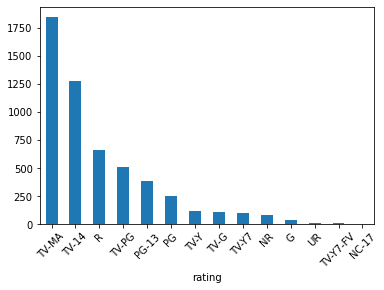

In [41]:
movies_ratings.plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

In [51]:
df2 = pd.DataFrame(
    {
        'col1':['A', 'A', 'A', 'B'],
        'col2':[1,2,3,4]
    }
)

Grouping a dataframe

In [54]:
df2 = df2.groupby("col1").size()

In [ ]:
df2.to_frame(name="sum")

In [ ]:
df2.reset_index(name='blah')

Grouping with to_frame and reset_index

In [74]:
netflix_series\
.groupby('rating').size()\
.sort_values(ascending=False)\
.to_frame("Sum of TV Shows")\
.reset_index('rating')


,rating,Sum of TV Shows
0,TV-MA,1018
1,TV-14,659
2,TV-PG,301
3,TV-Y7,176
4,TV-Y,163
5,TV-G,83
6,NR,5
7,R,2
8,TV-Y7-FV,1


Same way with one less step

In [75]:
netflix_series\
.groupby('rating').size()\
.sort_values(ascending=False)\
.reset_index(name="Sum of TV Shows")

,rating,Sum of TV Shows
0,TV-MA,1018
1,TV-14,659
2,TV-PG,301
3,TV-Y7,176
4,TV-Y,163
5,TV-G,83
6,NR,5
7,R,2
8,TV-Y7-FV,1


In [76]:
shows_per_rating = netflix_series\
.groupby('rating').size()\
.sort_values(ascending=False)\
.reset_index(name="Sum of TV Shows")

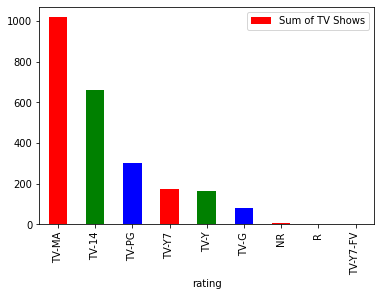

In [77]:
shows_per_rating.plot(
    x="rating",
    y="Sum of TV Shows",
    kind="bar",
    color=['red', 'green', 'blue']
)

plt.show()

In [78]:
movies_by_released_year = netflix_series\
.groupby('release_year').size()\
.sort_values(ascending=False)\
.reset_index(name='movie_count')

In [79]:
movies_before_1980 = movies_by_released_year[movies_by_released_year['release_year']<=1980] 

movies_between_1980_2000 = movies_by_released_year[(movies_by_released_year['release_year'] > 1980) & (movies_by_released_year['release_year'] < 2000)] 

movies_after_2000 = movies_by_released_year[movies_by_released_year['release_year'] >= 2000]

In [80]:
after_2000 = movies_after_2000.sort_values('release_year', ascending=False)

before_1979 = movies_before_1980.sort_values('release_year', ascending=False)

between_1980_2000 = movies_between_1980_2000.sort_values('release_year', ascending=False)

In [ ]:
plt.plot(before_1979.release_year,\
         before_1979.movie_count,\
         label="Until 1979",\
         linestyle='--',\
         marker='o',\
         color='g'
         )

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Movie VS TV Show count by release year')
plt.legend()
plt.show()